# Capstone Project: Analysis of Stock price and forecasting using LSTM

## Rezoan Ahmed Shuvro

In [415]:
# Import libraries
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [327]:
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 4, 24)

In [328]:
# Energy transfer
ET = data.DataReader("ET", 'yahoo', start, end)

In [329]:
#SPY (S&P 500)
VOO = data.DataReader("VOO", 'yahoo', start, end)

In [330]:
# Microsoft
MSFT = data.DataReader("MSFT", 'yahoo', start, end)

In [379]:
# Simon properties
SPG = data.DataReader("SPG", 'yahoo', start, end)

In [332]:
# FANG
FANG = data.DataReader("FANG", 'yahoo', start, end)

In [333]:
# VGT
VGT = data.DataReader("VGT", 'yahoo', start, end)

In [334]:
tickers = ['ET', 'FANG', 'MSFT', 'SPG', 'VGT', 'VOO']

In [376]:
my_stocks = pd.concat([ET,FANG, MSFT,SPG, VGT, VOO],axis=1, keys=tickers)

In [504]:
my_stocks.columns.names = ['ticker', 'info']
my_stocks.tail()

ticker        ET                                               FANG  \
info        High   Low  Open Close      Volume Adj Close       High   
Date                                                                  
2020-04-20  6.45  5.71  5.80  6.08  40978800.0      6.08  32.480000   
2020-04-21  6.19  5.82  5.92  6.14  29398100.0      6.14  31.540001   
2020-04-22  6.57  6.12  6.30  6.48  27209800.0      6.48  34.650002   
2020-04-23  7.10  6.63  6.75  7.05  36418800.0      7.05  37.830002   
2020-04-24  7.49  7.02  7.28  7.19  42761400.0      7.19  39.490002   

ticker                                          ...             VGT  \
info              Low       Open      Close     ...            Open   
Date                                            ...                   
2020-04-20  28.549999  29.000000  30.860001     ...      232.490005   
2020-04-21  29.150000  29.469999  31.400000     ...      228.479996   
2020-04-22  32.980000  33.200001  34.240002     ...      227.570007   
2020-04-23  34.849998  35.450001  37.099998     ...      231.130005   
2020-04-24  35.160000  37.880001  35.779999     ...      230.240005   

ticker                                                VOO              \
info             Close     Volume   Adj Close        High         Low   
Date                                                                    
2020-04-20  231.660004  1313000.0  231.660004  263.100006  258.579987   
2020-04-21  222.139999  1050000.0  222.139999  255.490005  250.000000   
2020-04-22  230.559998   674400.0  230.559998  258.230011  254.479996   
2020-04-23  229.380005   600800.0  229.380005  260.899994  256.200012   
2020-04-24  233.889999   856600.0  233.889999  260.700012  255.940002   

ticker                                                     
info              Open       Close     Volume   Adj Close  
Date                                                       
2020-04-20  259.649994  258.859985  6498700.0  258.859985  
2020-04-21  254.250000  250.949997  6526100.0  250.949997  
2020-04-22  255.830002  256.470001  5634200.0  256.470001  
2020-04-23  257.750000  256.420013  7665400.0  256.420013  
2020-04-24  258.000000  260.140015  4768200.0  260.140015  

[5 rows x 36 columns]

In [505]:
# All time high price
my_stocks.xs(key='Close',axis=1,level='info').max()

ticker
ET       35.240002
FANG    139.919998
MSFT    188.699997
SPG     227.600006
VGT     273.209991
VOO     310.920013
dtype: float64

In [503]:
#Latest stock price 

my_stocks.xs(key='Close',axis=1,level='info').reset_index()[my_stocks.reset_index().Date>'2020-04-23'].transpose()[1:]

,3853
ticker,
ET,7.19
FANG,35.78
MSFT,174.55
SPG,51.49
VGT,233.89
VOO,260.14


In [516]:
#all time lowest stock price 

my_stocks.xs(key='Close',axis=1,level='info').min()

ticker
ET        3.322500
FANG     15.560000
MSFT     15.150000
SPG      24.308067
VGT      29.270000
VOO     100.339996
dtype: float64

In [512]:
#risk_reward analysis

MSFT_log_mean = np.log(my_stocks['MSFT'].Close).mean()
MSFT_log_std = np.log(my_stocks['MSFT'].Close).std()
VOO_log_mean = np.log(my_stocks['VOO'].Close).mean()
VOO_log_std = np.log(my_stocks['VOO'].Close).std()
VGT_log_mean = np.log(my_stocks['VGT'].Close).mean()
VGT_log_std = np.log(my_stocks['VGT'].Close).std()
ET_log_mean = np.log(my_stocks['ET'].Close).mean()
ET_log_std = np.log(my_stocks['ET'].Close).std()
SPG_log_mean = np.log(my_stocks['SPG'].Close).mean()
SPG_log_std = np.log(my_stocks['SPG'].Close).std()
FANG_log_mean = np.log(my_stocks['FANG'].Close).mean()
FANG_log_std = np.log(my_stocks['FANG'].Close).std()

In [513]:
log_mean =  [MSFT_log_mean,VOO_log_mean,ET_log_mean,SPG_log_mean,FANG_log_mean,VGT_log_mean]
log_std =  [MSFT_log_std,VOO_log_std,ET_log_std,SPG_log_std,FANG_log_std,VGT_log_std]
risk_reward = pd.DataFrame({'ticker':['MSFT','VOO','VGT','ET','SPG','FANG'],'log_mean':log_mean,'log_std':log_std})
risk_reward

,ticker,log_mean,log_std
0,MSFT,3.701443,0.565445
1,VOO,5.197677,0.293808
2,VGT,2.478508,0.488550
3,ET,4.752337,0.438033
4,SPG,4.294423,0.487691
5,FANG,4.394346,0.524867


In [514]:
np.log(my_stocks['VGT'].Close).mean()

4.3943462314568

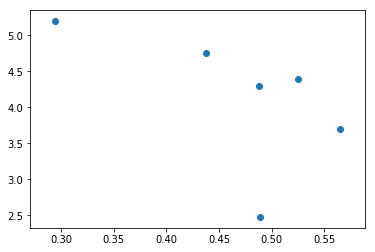

In [515]:
plt.scatter(risk_reward.log_std,risk_reward.log_mean)

In [517]:
# find the lowest price and ticker for each stock

pd.merge(pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').idxmin()),
          pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').min()),on='ticker')

,0_x,0_y
ticker,,
ET,2008-11-21,3.322500
FANG,2020-03-18,15.560000
MSFT,2009-03-09,15.150000
SPG,2009-03-06,24.308067
VGT,2008-11-20,29.270000
VOO,2011-10-03,100.339996


In [518]:
# find the highest price and ticker for each stock 

pd.merge(pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').idxmax()),
          pd.DataFrame(my_stocks.xs(key='Close',axis=1,level='info').max()),on='ticker')

,0_x,0_y
ticker,,
ET,2015-06-15,35.240002
FANG,2018-10-03,139.919998
MSFT,2020-02-10,188.699997
SPG,2016-08-01,227.600006
VGT,2020-02-19,273.209991
VOO,2020-02-19,310.920013


In [519]:
returns = pd.DataFrame()

In [520]:
for tick in tickers:
    returns[tick+' Return'] = my_stocks[tick]['Close'].pct_change()
returns.tail()

,ET Return,FANG Return,MSFT Return,SPG Return,VGT Return,VOO Return
Date,,,,,,
2020-04-20,-0.012987,-0.020939,-0.019821,-0.040805,-0.016598,-0.018019
2020-04-21,0.009868,0.017498,-0.041357,-0.005016,-0.041095,-0.030557
2020-04-22,0.055375,0.090446,0.033965,-0.020538,0.037904,0.021996
2020-04-23,0.087963,0.083528,-0.012102,0.013153,-0.005118,-0.000195
2020-04-24,0.019858,-0.035580,0.018259,-0.031232,0.019662,0.014507


In [475]:
returns.idxmin()

ET Return     2016-02-08
FANG Return   2020-03-09
MSFT Return   2020-03-16
SPG Return    2020-03-16
VGT Return    2020-03-16
VOO Return    2020-03-16
dtype: datetime64[ns]

In [476]:
returns.idxmax()

ET Return     2016-01-22
FANG Return   2020-03-19
MSFT Return   2008-10-13
SPG Return    2008-11-24
VGT Return    2020-03-13
VOO Return    2020-03-24
dtype: datetime64[ns]

In [477]:
# standard deviation of the return 
returns.std() # risk profile

ET Return      0.026226
FANG Return    0.029783
MSFT Return    0.017199
SPG Return     0.025360
VGT Return     0.013752
VOO Return     0.010779
dtype: float64

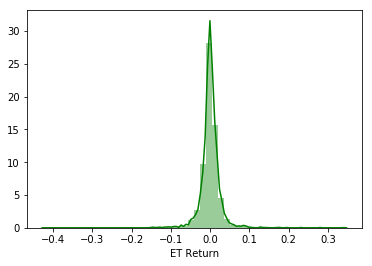

In [522]:
_=sns.distplot(returns.ix['2005-01-01':'2020-4-24']['ET Return'],color='green',bins=50)

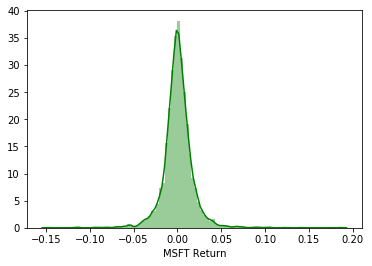

In [523]:
_=sns.distplot(returns.ix['2005-01-01':'2020-4-24']['MSFT Return'],color='green',bins=100)

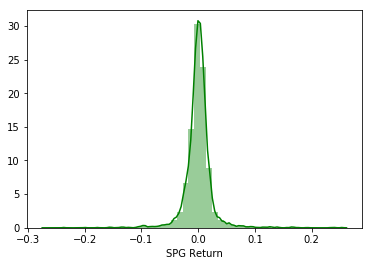

In [524]:
_=sns.distplot(returns.ix['2005-01-01':'2020-4-24']['SPG Return'],color='green',bins=50)

Text(0, 0.5, 'Stock price ($)')

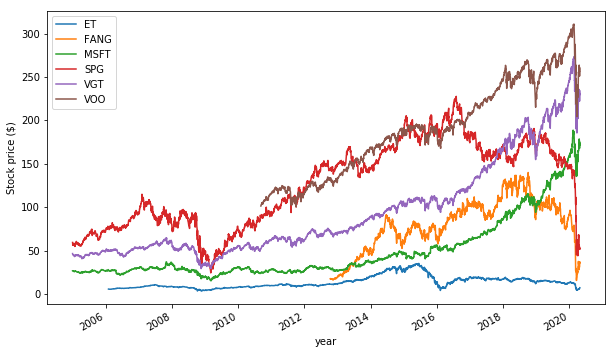

In [525]:
# daily stock closing price plot
for tick in tickers:
    my_stocks[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()
plt.xlabel('year')
plt.ylabel('Stock price ($)')

Text(0, 0.5, 'Stock price ($)')

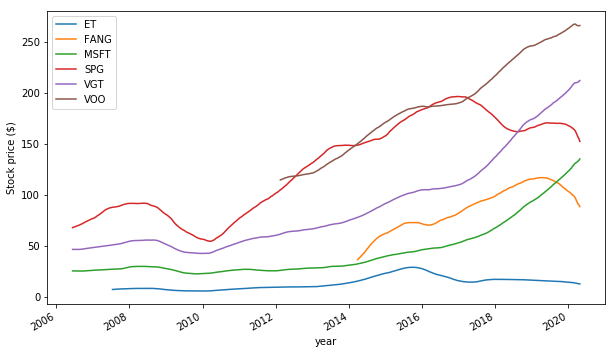

In [526]:
# 365 day rolloing average stock closing price plot
for tick in tickers:
    my_stocks[tick]['Close'].rolling(window=365).mean().plot(figsize=(10,6),label=tick)
plt.legend()
plt.xlabel('year')
plt.ylabel('Stock price ($)')

Text(0, 0.5, 'Stock price ($)')

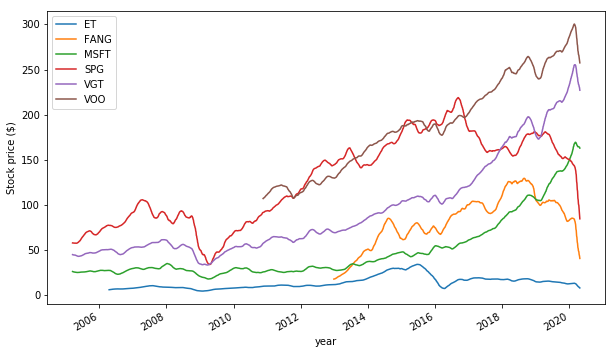

In [527]:
# 50 day stock closing price plot

for tick in tickers:
    my_stocks[tick]['Close'].rolling(window=50).mean().plot(figsize=(10,6),label=tick)
plt.legend()
plt.xlabel('year')
plt.ylabel('Stock price ($)')

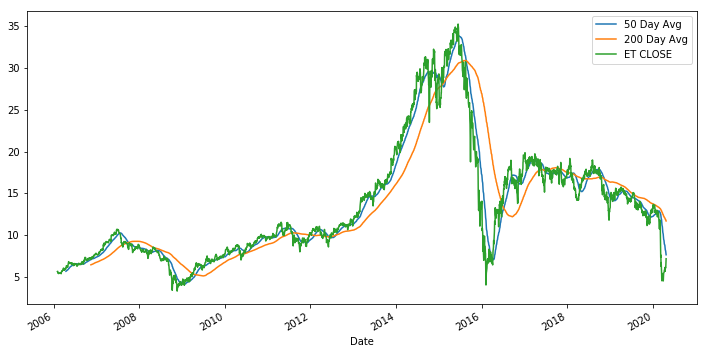

In [528]:
# daily, 50 day, 200 day stock closing price plot

plt.figure(figsize=(12,6))
ET['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=50).mean().plot(label='50 Day Avg')
ET['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=200).mean().plot(label='200 Day Avg')
ET['Close'].ix['2005-01-01':'2020-04-24'].plot(label='ET CLOSE')
plt.legend()

In [529]:
# ABBV 
ABBV = data.DataReader("ABBV", 'yahoo', start, end)

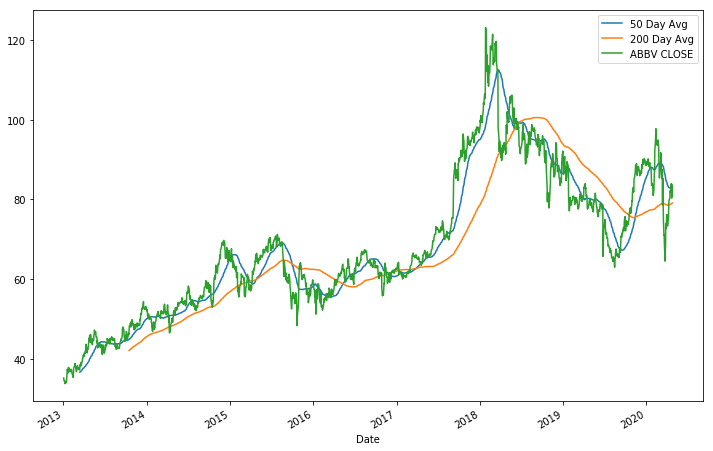

In [530]:
# checking the golden cross

plt.figure(figsize=(12,8))
_=ABBV['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=50).mean().plot(label='50 Day Avg')
_=ABBV['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=200).mean().plot(label='200 Day Avg')
_=ABBV['Close'].ix['2005-01-01':'2020-04-24'].plot(label='ABBV CLOSE')
_=plt.legend()

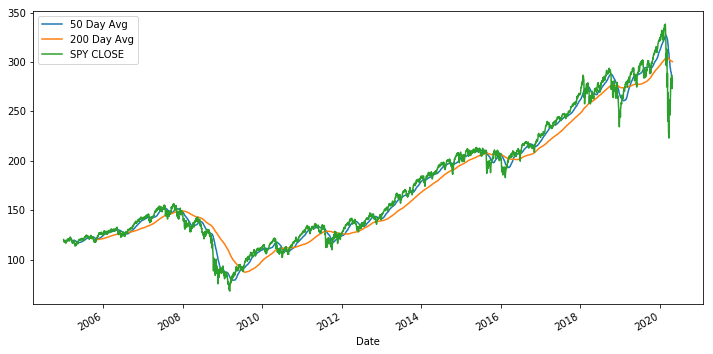

In [531]:
# checking the golden cross

plt.figure(figsize=(12,6))
SPY['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=50).mean().plot(label='50 Day Avg')
SPY['Close'].ix['2005-01-01':'2020-04-24'].rolling(window=200).mean().plot(label='200 Day Avg')
SPY['Close'].ix['2005-01-01':'2020-04-24'].plot(label='SPY CLOSE')
plt.legend()

In [546]:
# S&P500 STOCK PRICE FALL AFTER covid 19
((VOO.Close.loc['2020-04-24'] - VOO.Close.loc['2020-02-19'] )/ VOO.Close.loc['2020-02-19'])*100

-16.3321743812736

In [543]:
# MSFT  STOCK PRICE FALL AFTER covid 19
((MSFT.Close.loc['2020-04-24'] - MSFT.Close.loc['2020-02-19'] )/ MSFT.Close.loc['2020-02-19'])*100

-6.797306605357751

In [544]:
# SPG  STOCK PRICE FALL AFTER covid 19
((SPG.Close.loc['2020-04-24'] - SPG.Close.loc['2020-02-19'] )/ SPG.Close.loc['2020-02-19'])*100

-62.41879881551432

### Simon properties, the largest  retail mall got severely hit due to corona virus. A 62% decrese in value where Microsoft lost only 6% where S&P 500 lost 16% value. 

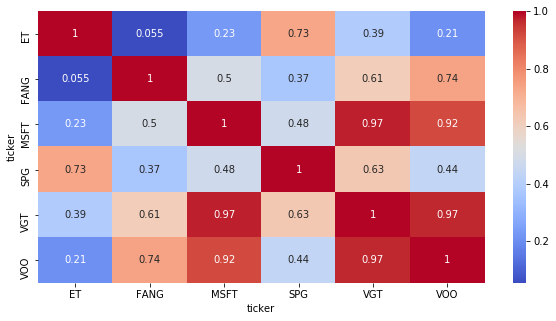

In [547]:
# stock price correlation

plt.figure(figsize = (10,5))
sns.heatmap(my_stocks.xs(key='Close',axis=1,level='info').corr(),annot=True, cmap='coolwarm')

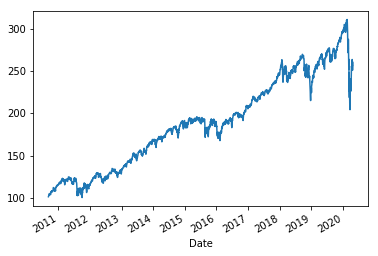

In [411]:
#SPY (S&P 500)
start = datetime.datetime(1970, 1, 1)
end =  datetime.datetime(2024, 4, 24)
SP500 = data.DataReader("VOO", 'yahoo',start,end)
pd.DataFrame(SP500).Close.plot()

### A function to scrap the amount of dividend paid 

Credit:  https://medium.com/c%C3%B3digo-ecuador/python-web-scraping-yahoo-finance-stock-dividend-history-d9084c85c805


In [551]:

from datetime import datetime, timedelta
import time, requests, pandas, lxml
from lxml import html
def format_date(date_datetime):
     date_timetuple = date_datetime.timetuple()
     date_mktime = time.mktime(date_timetuple)
     date_int = int(date_mktime)
     date_str = str(date_int)
     return date_str
def subdomain(symbol, start, end):
     format_url = "{0}/history?period1={1}&period2={2}"    
     tail_url = "&interval=div%7Csplit&filter=div&frequency=1d"
     subdomain = format_url.format(symbol, start, end) + tail_url
     return subdomain
def header(subdomain):
     hdrs = {"authority": "finance.yahoo.com",
                "method": "GET",
                "path": subdomain,
                "scheme": "https",
                "accept": "text/html,application/xhtml+xml",
                "accept-encoding": "gzip, deflate, br",
                "accept-language": "en-US,en;q=0.9",
                "cache-control": "no-cache",
                "cookie": "cookies",
                "dnt": "1",
                "pragma": "no-cache",
                "sec-fetch-mode": "navigate",
                "sec-fetch-site": "same-origin",
                "sec-fetch-user": "?1",
                "upgrade-insecure-requests": "1",
                "user-agent": "Mozilla/5.0"}
     return hdrs
def scrape_page(url, header):
     page = requests.get(url, headers=header)
     element_html = html.fromstring(page.content)
     table = element_html.xpath('//table')
     table_tree = lxml.etree.tostring(table[0], method='xml')
     panda = pandas.read_html(table_tree)
     return panda
def clean_dividends(symbol, dividends):
     index = len(dividends)     
     dividends = dividends.drop(index-1)
     dividends = dividends.set_index('Date')
     dividends = dividends['Dividends']
     dividends = dividends.str.replace(r'\Dividend', '')
     dividends = dividends.astype(float)
     dividends.name = symbol
     return dividends

if __name__ == '__main__':
     
     symbol = "ET"     #create datetime objects
     start = datetime.today() - timedelta(days=9125)
     end = datetime.today()#properly format the date to epoch time
     start = format_date(start)
     end = format_date(end)#format the subdomain
     sub = subdomain(symbol, start, end)#customize the request header
     hdrs = header(sub)
     
     #concatenate the subdomain with the base URL
     base_url = "https://finance.yahoo.com/quote/"
     url = base_url + sub#scrape the dividend history table from Yahoo Finance
     dividends = scrape_page(url, hdrs)#clean the dividend history table
     clean_div = clean_dividends(symbol, dividends[0])

In [552]:
ET_div= pd.DataFrame(clean_div).reset_index()

In [168]:
MSFT_div= pd.DataFrame(clean_div).reset_index()

In [177]:
VGT_div= pd.DataFrame(clean_div).reset_index()

In [179]:
FANG_div= pd.DataFrame(clean_div).reset_index()

In [181]:
SPG_div= pd.DataFrame(clean_div).reset_index()

In [186]:
VOO_div= pd.DataFrame(clean_div).reset_index()

In [338]:
dividend = pd.concat([MSFT_div.Date, ET_div.ET, FANG_div.FANG,
                      MSFT_div.MSFT,SPG_div.SPG,VGT_div.VGT,VOO_div.VOO],axis=1)

In [339]:
dividend.set_index('Date',inplace=True)

In [350]:
dividend.fillna(value=0,inplace=True)

In [351]:
dividend = dividend[dividend.MSFT !=0]

In [354]:
dividend.reset_index(inplace=True)

In [355]:
dividend['Date'] = pd.DatetimeIndex(dividend.Date)

In [356]:
dividend.sort_values('Date',ascending=True,inplace=True)

In [357]:
dividend.set_index('Date',inplace=True)

In [358]:
dividend_yearly = dividend.resample('y').sum()

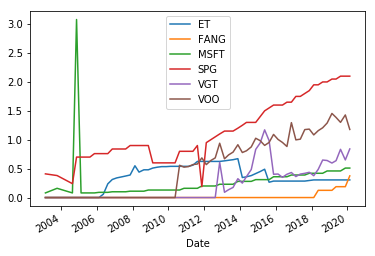

In [553]:
# qurterly paid dividends
_= dividend.plot()
plt.xlabel('year')
plt.ylabel('Dividend ($) per share')

In [554]:
dividend_yearly= dividend_yearly.reset_index()[dividend_yearly.reset_index().Date<'2020-12-31']

Text(0, 0.5, 'Dividend ($) per share')

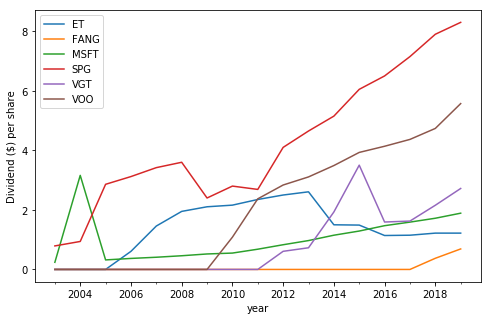

In [362]:
_= dividend_yearly.set_index('Date').plot(figsize=(8,5))
plt.xlabel('year')
plt.ylabel('Dividend ($) per share')

## Prediction using LSTM

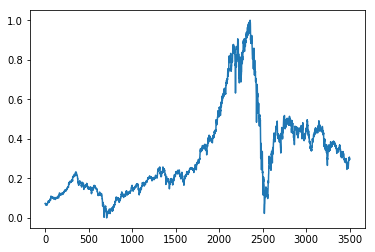

In [548]:
ET_train = ET.Close.loc['2005-01-01':'2019-12-31'].values
ET_test = ET.Close.loc['2020-01-01':'2024-04-24'].values

#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
ET_train_scaled = sc.fit_transform(ET_train.reshape(-1,1))

plt.plot(ET_train_scaled)